In [96]:
s1="It is a good practice for us"
s2="it was also good to know about it"
s=s1+' '+s2
print(s)
a=s.split()
a=[a.lower() for a in a]
a=list(set(a))
s11=[]
s12=[]
for i in a:
    s11.append(s1.split().count(i))
    s12.append(s2.split().count(i))
import pandas as pd
a=pd.DataFrame({'worsds':a,'sent1':s11,'sent2':s12})
a

It is a good practice for us it was also good to know about it


,worsds,sent1,sent2
0,a,1,0
1,it,0,2
2,practice,1,0
3,for,1,0
4,good,1,1
5,was,0,1
6,to,0,1
7,know,0,1
8,also,0,1
9,us,1,0


In [97]:
from nltk.tokenize import word_tokenize
s1="It is a good practice for us."
s2="it was also good to know about it."
s1=s1.lower()
s2=s2.lower()
columns=set(word_tokenize(s1.lower())+word_tokenize(s2.lower()))
columns
s11=[]
s12=[]
for i in columns:
    s11.append(word_tokenize(s1.lower()).count(i))
    s12.append(word_tokenize(s2.lower()).count(i))
print(s11)
print(s12)
import pandas as pd
bag=pd.DataFrame({'sent1':s11,'sent2':s12})
bag.index=columns
bag=bag.T
bag

[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
[0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]


,a,it,practice,for,good,was,to,know,also,us,about,is,.
sent1,1,1,1,1,1,0,0,0,0,1,0,1,1
sent2,0,2,0,0,1,1,1,1,1,0,1,0,1


In [98]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
new_data=cv.fit_transform([s1,s2])
new_data.toarray()
cv.get_feature_names_out()
a=pd.DataFrame(new_data.toarray())
a.columns=cv.get_feature_names_out()
a

,about,also,for,good,is,it,know,practice,to,us,was
0,0,0,1,1,1,1,0,1,0,1,0
1,1,1,0,1,0,2,1,0,1,0,1


In [99]:
cvt=CountVectorizer(ngram_range=(2,2))
new_data=cvt.fit_transform([s1,s2])
new_data.toarray()
print(cvt.get_feature_names_out())
a=pd.DataFrame(new_data.toarray())
a.columns=cvt.get_feature_names_out()
a

['about it' 'also good' 'for us' 'good practice' 'good to' 'is good'
 'it is' 'it was' 'know about' 'practice for' 'to know' 'was also']


,about it,also good,for us,good practice,good to,is good,it is,it was,know about,practice for,to know,was also
0,0,0,1,1,0,1,1,0,0,1,0,0
1,1,1,0,0,1,0,0,1,1,0,1,1


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
new_data=tfid.fit_transform([s1,s2])
new_data.toarray()
df=pd.DataFrame(data=new_data.toarray(),columns=tfid.get_feature_names_out())
df

,about,also,for,good,is,it,know,practice,to,us,was
0,0.000000,0.000000,0.446656,0.317800,0.446656,0.317800,0.000000,0.446656,0.000000,0.446656,0.000000
1,0.364391,0.364391,0.000000,0.259267,0.000000,0.518534,0.364391,0.000000,0.364391,0.000000,0.364391


In [101]:
###SMSSpamCollection


<Axes: ylabel='count'>

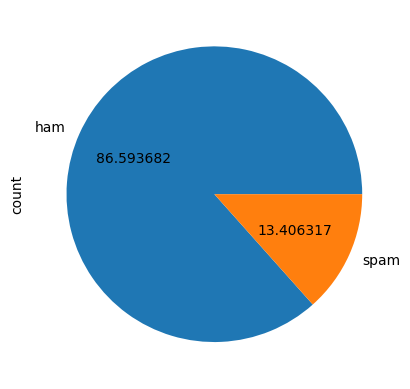

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_table('SMSSpamCollection',header=None)
df.columns=['label','text']
X=df['text']
y=df['label']
y.value_counts().plot(kind='pie',autopct='%1f')

In [103]:
!pip install pip -U


In [104]:
!pip install pillow wordcloud -U


In [105]:
spam=df[df['label']=='spam']['text'].str.cat(sep=' ')
not_spam=df[df['label']=='ham']['text'].str.cat(sep=' ')


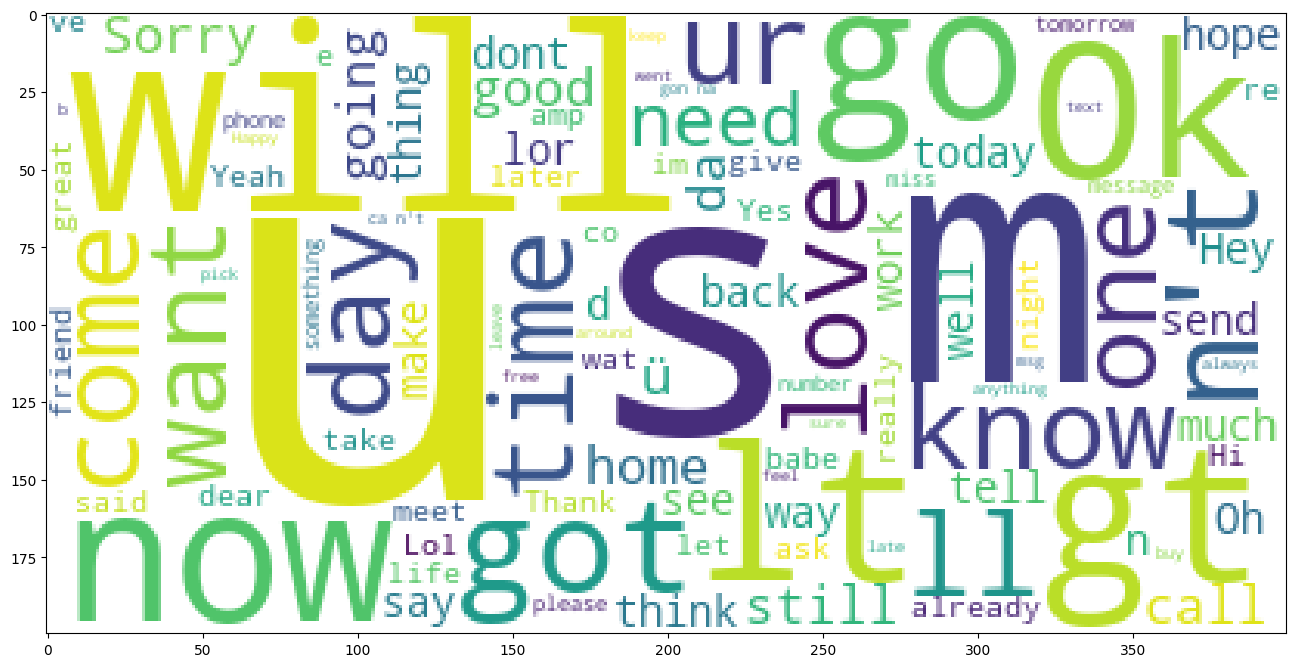

In [106]:
from wordcloud import WordCloud
wc_not_spam=WordCloud(background_color='white',max_words=100).generate(' '.join(word_tokenize(not_spam)))
plt.figure(figsize=(16,9))
plt.imshow(wc_not_spam)

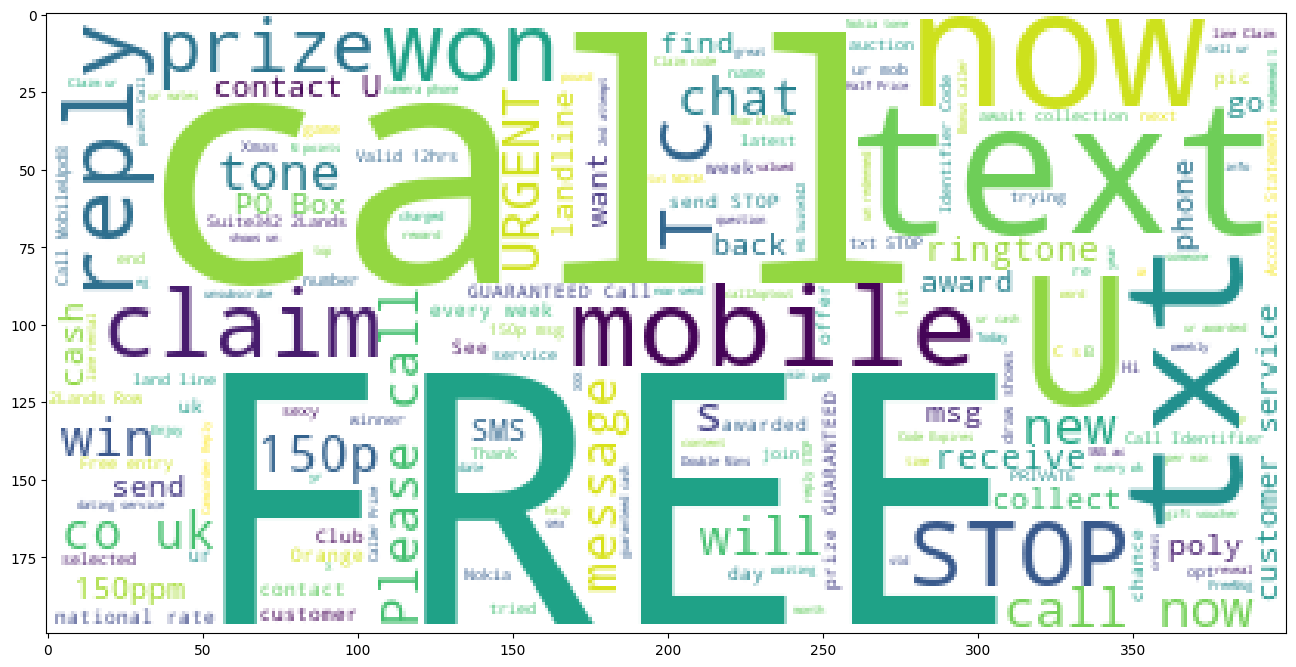

In [107]:
wc_spam=WordCloud(background_color='white').generate(' '.join(word_tokenize(spam)))
plt.figure(figsize=(16,9))
plt.imshow(wc_spam)


In [108]:
#top words is given 100% all other words are assigne d in proportion
wc_spam.words_

{'FREE': 1.0,
 'call': 0.875,
 'text': 0.63,
 'U': 0.585,
 'txt': 0.5,
 'now': 0.5,
 'mobile': 0.47,
 'won': 0.34,
 'claim': 0.315,
 'STOP': 0.315,
 'reply': 0.31,
 'prize': 0.305,
 'T C': 0.3,
 'call now': 0.29,
 'URGENT': 0.28,
 'win': 0.27,
 'new': 0.27,
 'tone': 0.265,
 'co uk': 0.245,
 '150p': 0.24,
 'Please call': 0.23,
 'will': 0.22,
 's': 0.21,
 'message': 0.21,
 'chat': 0.2,
 'ringtone': 0.18,
 'cash': 0.17,
 'receive': 0.165,
 'send': 0.145,
 'award': 0.14,
 'want': 0.135,
 'poly': 0.135,
 'customer service': 0.135,
 'PO Box': 0.135,
 'contact U': 0.135,
 'msg': 0.125,
 'go': 0.125,
 'SMS': 0.12,
 'landline': 0.12,
 'back': 0.115,
 '150ppm': 0.115,
 'find': 0.115,
 'collect': 0.115,
 'phone': 0.115,
 'GUARANTEED Call': 0.115,
 'day': 0.11,
 'uk': 0.11,
 'offer': 0.11,
 'chance': 0.11,
 'prize GUARANTEED': 0.11,
 'contact': 0.105,
 'pic': 0.105,
 'week': 0.1,
 'customer': 0.1,
 'send STOP': 0.1,
 'national rate': 0.1,
 'ur': 0.095,
 'awarded': 0.095,
 'See': 0.095,
 'Club': 0.

In [109]:
### Data Preparation for machine learning algorithm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [112]:
sent="Hello friends! How are you? I like python progrmming."
#1 tokenize
def clean_data(sent):
    token1=word_tokenize(sent)
    #2 remove the punctuations
    tokens2=[token for token in token1 if token.isalnum()]
    #3 remove stopwords
    swords=stopwords.words('english')
    tokens3=[a for a in tokens2 if a.lower() not in swords]
    #4 remove stemm
    ps=PorterStemmer()
    tokens4=[ps.stem(a) for a in tokens3]
    return tokens4
clean_data(sent=sent)
df['cleaned_data']=df['text'].apply(clean_data)


In [202]:
# before applying vectorizer we first clean data hence we have paseed analyzer=clean_data function
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(analyzer=clean_data)
X_new=tfid.fit_transform(X)
X_new

<5572x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 47556 stored elements in Compressed Sparse Row format>

In [140]:
### Cross Valiidation
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=0,stratify=y)

In [197]:

from sklearn.svm import SVC
svm=SVC(kernel='linear',random_state=0)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [198]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

print(accuracy_score(y_test,y_pred))

0.9770279971284996


In [203]:
f=open('sample.csv')
data=f.readlines()

svm.predict(tfid.transform(data))


array(['ham', 'spam', 'ham'], dtype=object)